In [ ]:
# Tchelinux Live 2020 - https://github.com/alexcamargoweb/tchelinux-2020
# Respositório da palestra "IA versus COVID-19: Deep Learning, Códigos e Execução em Nuvem".
# Classificação de raios-x de tórax (positivo ou negativo)
# Adaptado de Adrian Rosebrock - https://pyimagesearch.com
# Arquivo: predict_tchelinux-2020.ipynb

### Bônus: Classificar uma nova imagem

In [1]:
# Importação dos pacotes necessários
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# Monta o Google Drive
from google.colab import drive, output, files
drive.mount('/content/drive')

%cd /content/drive/My\Drive/tchelinux-2020/inputs
output.clear()

# Remove possíveis imagens antigas
!rm -R /content/drive/MyDrive/tchelinux-2020/inputs/* > /dev/null 
output.clear()

In [5]:
# Permite o upload de uma imagem (raio-x de tórax)
file_ = files.upload() 
# Caminho do modelo
MODEL = '/content/drive/MyDrive/tchelinux-2020/models/model_tchelinux-2020.h5'
# Caminho da imagem enviada
DIR = '/content/drive/MyDrive/tchelinux-2020/inputs'
# Nome da imagem
IMG = list(file_)[0] 

Saving 1.png to 1.png



[INFO] carregando modelo treinado ...
[INFO] carregando imagem ...
[INFO] realizando a predição ...
[INFO] inserindo a classe na imagem ...
[INFO] imprimindo resultados ...
 
		Probabilidade(%)

NEGATIVO 	20.16
POSITIVO 	79.84


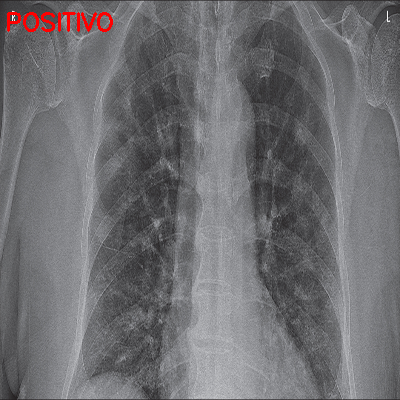

In [6]:
# Carrega o modelo treinando (model_tchelinux-2020.h5)
print("\n[INFO] carregando modelo treinado ...")
model = load_model(MODEL)

# Carrega a imagem enviada
print("[INFO] carregando imagem ...")
orig = cv2.imread(DIR+'/'+IMG)
img = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
img = cv2.resize(orig, (224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis = 0)

# Realiza a predição com base na imagem enviada
print("[INFO] realizando a predição ...")
pred = model.predict(img/255.0)
predictions = pred
pred = pred.argmax(axis = 1)[0]

# Insere a classe na imagem
print("[INFO] inserindo a classe na imagem ...")

# label: negativo
if pred == 0: label = "NEGATIVO" 
# color: verde
if pred == 0: color = (0, 255, 0) 

# label: positivo
if pred == 1: label = "POSITIVO" 
# color: red
if pred == 1: color = (0, 0, 255) 

# Redimensiona a imagem para um tamanho maior (apenas para visualização)
img = cv2.resize(orig, (400, 400))
cv2.putText(img, label, (5, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

print("[INFO] imprimindo resultados ...\n ")

print("\t\tProbabilidade(%)\n")
print("NEGATIVO \t{:.2f}".format(predictions[0][0]*100))
print("POSITIVO \t{:.2f}".format(predictions[0][1]*100))

# Exibe a imagem
cv2_imshow(img)